In [2]:
####### Importing Libraries
import os
import gc
import time
import random
import argparse
import tqdm
import torch
import evaluate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

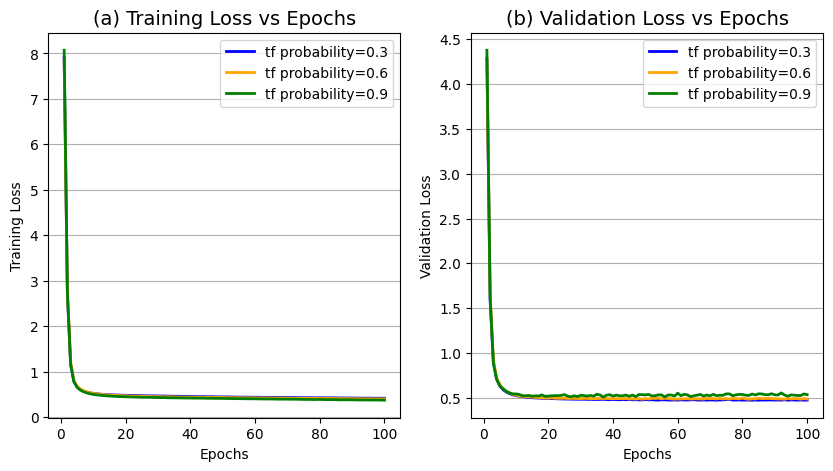

In [19]:
####### Teacher Forcing Plots
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for ax in [ax1,ax2]:

    ax.yaxis.grid(True)

    if(ax == ax1):

        loss_pt3 = np.load('./Loss/lstm-attn_tfp-pt3_trainloss.npz',allow_pickle=True)['arr_0']
        loss_pt6 = np.load('./Loss/lstm-attn_tfp-pt6_trainloss.npz',allow_pickle=True)['arr_0']
        loss_pt9 = np.load('./Loss/lstm-attn_tfp-pt9_trainloss.npz',allow_pickle=True)['arr_0']

        ax.plot(np.arange(1,101),loss_pt3,label='tf probability=0.3',color='blue',linewidth=2)
        ax.plot(np.arange(1,101),loss_pt6,label='tf probability=0.6',color='orange',linewidth=2)
        ax.plot(np.arange(1,101),loss_pt9,label='tf probability=0.9',color='green',linewidth=2)

        ax.set_xlabel('Epochs',fontsize=10)
        ax.set_ylabel('Training Loss',fontsize=10)

        ax.set_title('(a) Training Loss vs Epochs',fontsize=14)
        ax.legend()

    if(ax == ax2):

        loss_pt3 = np.load('./Loss/lstm-attn_tfp-pt3_valloss.npz',allow_pickle=True)['arr_0']
        loss_pt6 = np.load('./Loss/lstm-attn_tfp-pt6_valloss.npz',allow_pickle=True)['arr_0']
        loss_pt9 = np.load('./Loss/lstm-attn_tfp-pt9_valloss.npz',allow_pickle=True)['arr_0']

        ax.plot(np.arange(1,101),loss_pt3,label='tf probability=0.3',color='blue',linewidth=2)
        ax.plot(np.arange(1,101),loss_pt6,label='tf probability=0.6',color='orange',linewidth=2)
        ax.plot(np.arange(1,101),loss_pt9,label='tf probability=0.9',color='green',linewidth=2)

        ax.set_xlabel('Epochs',fontsize=10)
        ax.set_ylabel('Validation Loss',fontsize=10)

        ax.set_title('(b) Validation Loss vs Epochs',fontsize=14)
        ax.legend()

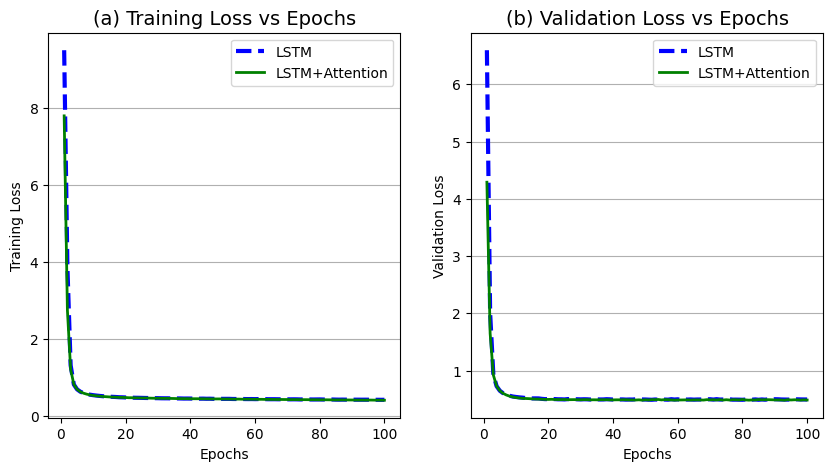

In [26]:
####### Attention Ablation Loss Plots
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for ax in [ax1,ax2]:

    ax.yaxis.grid(True)

    if(ax == ax1):

        loss = np.load('./Loss/lstm_tfp-pt6_trainloss.npz',allow_pickle=True)['arr_0']
        loss_attn = np.load('./Loss/lstm-attn_tfp-pt6_trainloss.npz',allow_pickle=True)['arr_0']

        ax.plot(np.arange(1,101),loss,label='LSTM',color='blue',linewidth=3,linestyle='dashed')
        ax.plot(np.arange(1,101),loss_attn,label='LSTM+Attention',color='green',linewidth=2)

        ax.set_xlabel('Epochs',fontsize=10)
        ax.set_ylabel('Training Loss',fontsize=10)


        ax.set_title('(a) Training Loss vs Epochs',fontsize=14)
        ax.legend()

    if(ax == ax2):

        loss = np.load('./Loss/lstm_tfp-pt6_valloss.npz',allow_pickle=True)['arr_0']
        loss_attn = np.load('./Loss/lstm-attn_tfp-pt6_valloss.npz',allow_pickle=True)['arr_0']

        ax.plot(np.arange(1,101),loss,label='LSTM',color='blue',linewidth=3,linestyle='dashed')
        ax.plot(np.arange(1,101),loss_attn,label='LSTM+Attention',color='green',linewidth=2)
        
        ax.set_xlabel('Epochs',fontsize=10)
        ax.set_ylabel('Validation Loss',fontsize=10)

        ax.set_title('(b) Validation Loss vs Epochs',fontsize=14)
        ax.legend()